# Market Basket Analysis for E-commerce


In [19]:
#load necessary packages

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [20]:
#read csv file
df = pd.read_csv('Market Basket Analysis - Groceries_dataset.csv')
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [21]:
#view summary statistics of the dataframe
df.describe(include='all')

,Member_number,Date,itemDescription
count,38765.000000,38765,38765
unique,NaN,728,167
top,NaN,21-01-2015,whole milk
freq,NaN,96,2502
mean,3003.641868,NaN,NaN
std,1153.611031,NaN,NaN
min,1000.000000,NaN,NaN
25%,2002.000000,NaN,NaN
50%,3005.000000,NaN,NaN
75%,4007.000000,NaN,NaN


In [4]:
#check for missing values
df.isna().any().any()

False

In [5]:
#convert member number to string and date to datetime format
df['Member_number'] = df['Member_number'].astype(str)
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38765 non-null  object        
 1   Date             38765 non-null  datetime64[ns]
 2   itemDescription  38765 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 908.7+ KB


In [6]:
#create new column - unique transactions
df['uniqueTransactions'] = df['Member_number'] + "_" + df['Date'].astype(str)
df.head()

,Member_number,Date,itemDescription,uniqueTransactions
0,1808,2015-07-21,tropical fruit,1808_2015-07-21
1,2552,2015-01-05,whole milk,2552_2015-01-05
2,2300,2015-09-19,pip fruit,2300_2015-09-19
3,1187,2015-12-12,other vegetables,1187_2015-12-12
4,3037,2015-02-01,whole milk,3037_2015-02-01


## Exploratory Data Analysis

Text(0, 0.5, 'item')

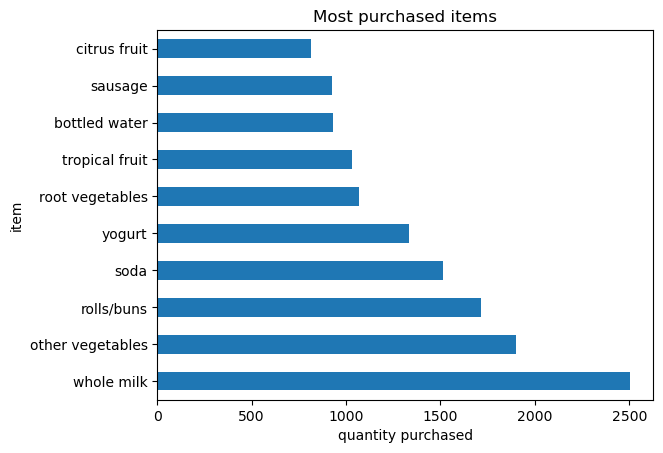

In [7]:
#Plotting the 10 most purchased items
df['itemDescription'].value_counts()[:10].plot(kind='barh')
plt.title('Most purchased items')
plt.xlabel('quantity purchased')
plt.ylabel('item')

Text(0, 0.5, 'item')

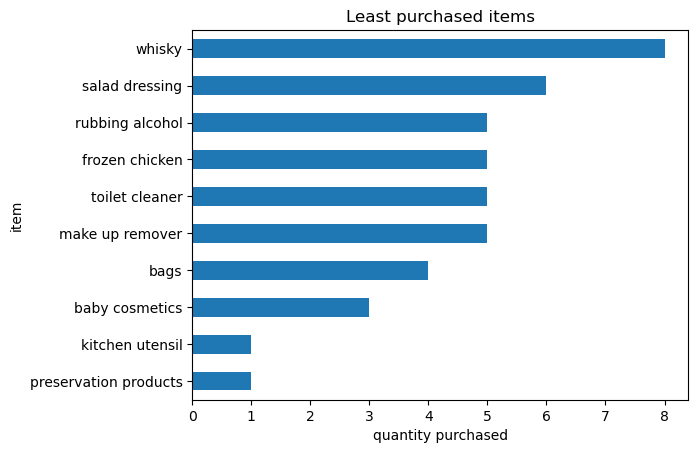

In [8]:
#Plotting the 10 least purchased items
df['itemDescription'].value_counts(ascending = True)[:10].plot(kind='barh')
plt.title('Least purchased items')
plt.xlabel('quantity purchased')
plt.ylabel('item')

In [9]:
#Checking cumulative frequency of the items purchased  
top20=df['itemDescription'].value_counts(normalize=True).head(20).sum()*100
least90=df['itemDescription'].value_counts(normalize=True, ascending=True).head(90).sum()*100
print('The 20 most purchased items account for '+ str("%.2f" % top20) + '% of all purchases.')
print('The 90 least purchased items account for '+ str("%.2f" % least90) + '% of all purchases.')


The 20 most purchased items account for 52.56% of all purchases.
The 90 least purchased items account for 9.10% of all purchases.


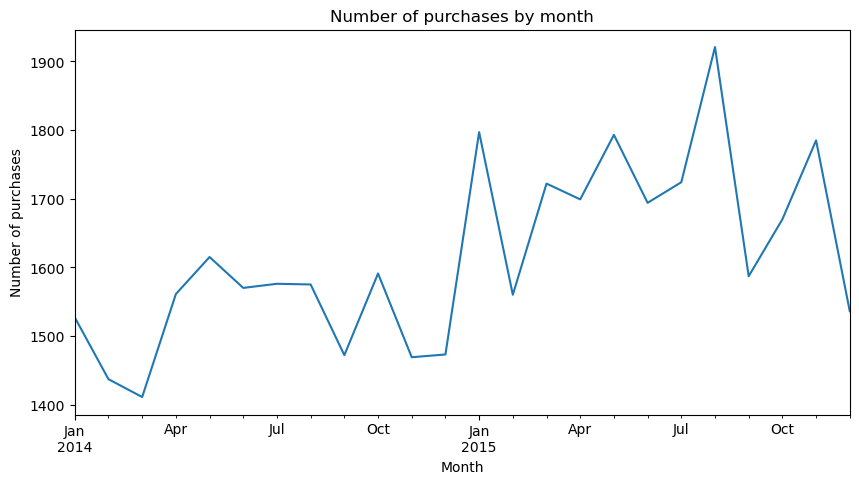

In [10]:
# Plotting the number of purchases by month 
df_date = df.set_index('Date')
df_date
df_date.resample('M')['uniqueTransactions'].count().plot(figsize=(10, 5))
plt.title('Number of purchases by month')
plt.xlabel('Month')
plt.ylabel('Number of purchases')
plt.show()

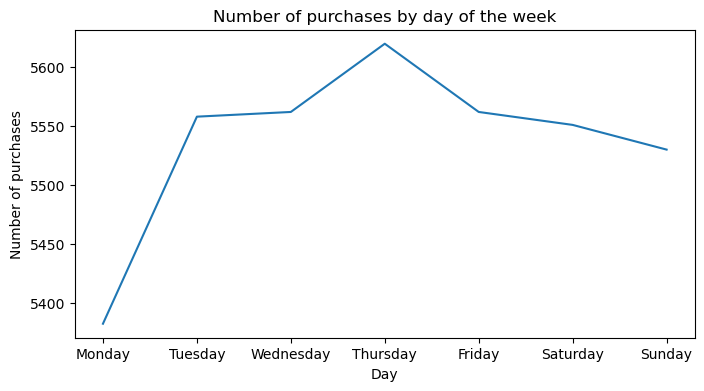

In [11]:
# Plotting the number of purchases per weekday 
df['weekday'] = pd.to_datetime(df['Date']).apply(lambda x: x.weekday())
df['day'] = df['weekday'].map({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'})
df['day'] = pd.Categorical(df['day'], categories=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], ordered=True)
df['day'].value_counts(sort=False).plot(figsize=(8, 4))
plt.title('Number of purchases by day of the week')
plt.xlabel('Day')
plt.ylabel('Number of purchases')
plt.show()

## Market Basket Analysis using Apriori Algorithm

In [12]:
# Cross-tab of uniqueTransaction and itemDescription
basket = pd.crosstab(df['uniqueTransactions'], df['itemDescription'])
basket.head()

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
uniqueTransactions,,,,,,,,,,,,,,,,,,,,,
1000_2014-06-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1000_2015-03-15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1000_2015-05-27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000_2015-07-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000_2015-11-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# convert each element to 1 if its value is greater than 0, otherwise to 0
apriori_df = basket.applymap(lambda x: 1 if x > 0 else 0)
apriori_df

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
uniqueTransactions,,,,,,,,,,,,,,,,,,,,,
1000_2014-06-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1000_2015-03-15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1000_2015-05-27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000_2015-07-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000_2015-11-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999_2015-05-16,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4999_2015-12-26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5000_2014-03-09,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
# Applying the Apriori algorithm to generate frequent itemsets from the binary-encoded DataFrame 'apriori_df'
# The 'min_support' parameter is set to 0.005, indicating the minimum support threshold for an itemset to be considered frequent
# 'use_colnames=True' ensures that item names are used instead of column indices in the resulting DataFrame
frequent_itemsets = apriori(apriori_df, min_support=0.005, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift")
rules.sort_values(by='zhangs_metric', ascending=False).head(10)

C:\Users\LENOVO\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
8,(other vegetables),(frankfurter),0.122101,0.037760,0.005146,0.042146,1.116150,0.000536,1.004579,0.118536
9,(frankfurter),(other vegetables),0.037760,0.122101,0.005146,0.136283,1.116150,0.000536,1.016420,0.108146
35,(yogurt),(sausage),0.085879,0.060349,0.005748,0.066926,1.108986,0.000565,1.007049,0.107508
34,(sausage),(yogurt),0.060349,0.085879,0.005748,0.095238,1.108986,0.000565,1.010345,0.104587
31,(soda),(sausage),0.097106,0.060349,0.005948,0.061253,1.014975,0.000088,1.000963,0.016341
30,(sausage),(soda),0.060349,0.097106,0.005948,0.098560,1.014975,0.000088,1.001613,0.015702
1,(bottled beer),(whole milk),0.045312,0.157923,0.007151,0.157817,0.999330,-0.000005,0.999874,-0.000702
0,(whole milk),(bottled beer),0.157923,0.045312,0.007151,0.045281,0.999330,-0.000005,0.999968,-0.000795
32,(sausage),(whole milk),0.060349,0.157923,0.008955,0.148394,0.939663,-0.000575,0.988811,-0.063965
33,(whole milk),(sausage),0.157923,0.060349,0.008955,0.056708,0.939663,-0.000575,0.996140,-0.070851


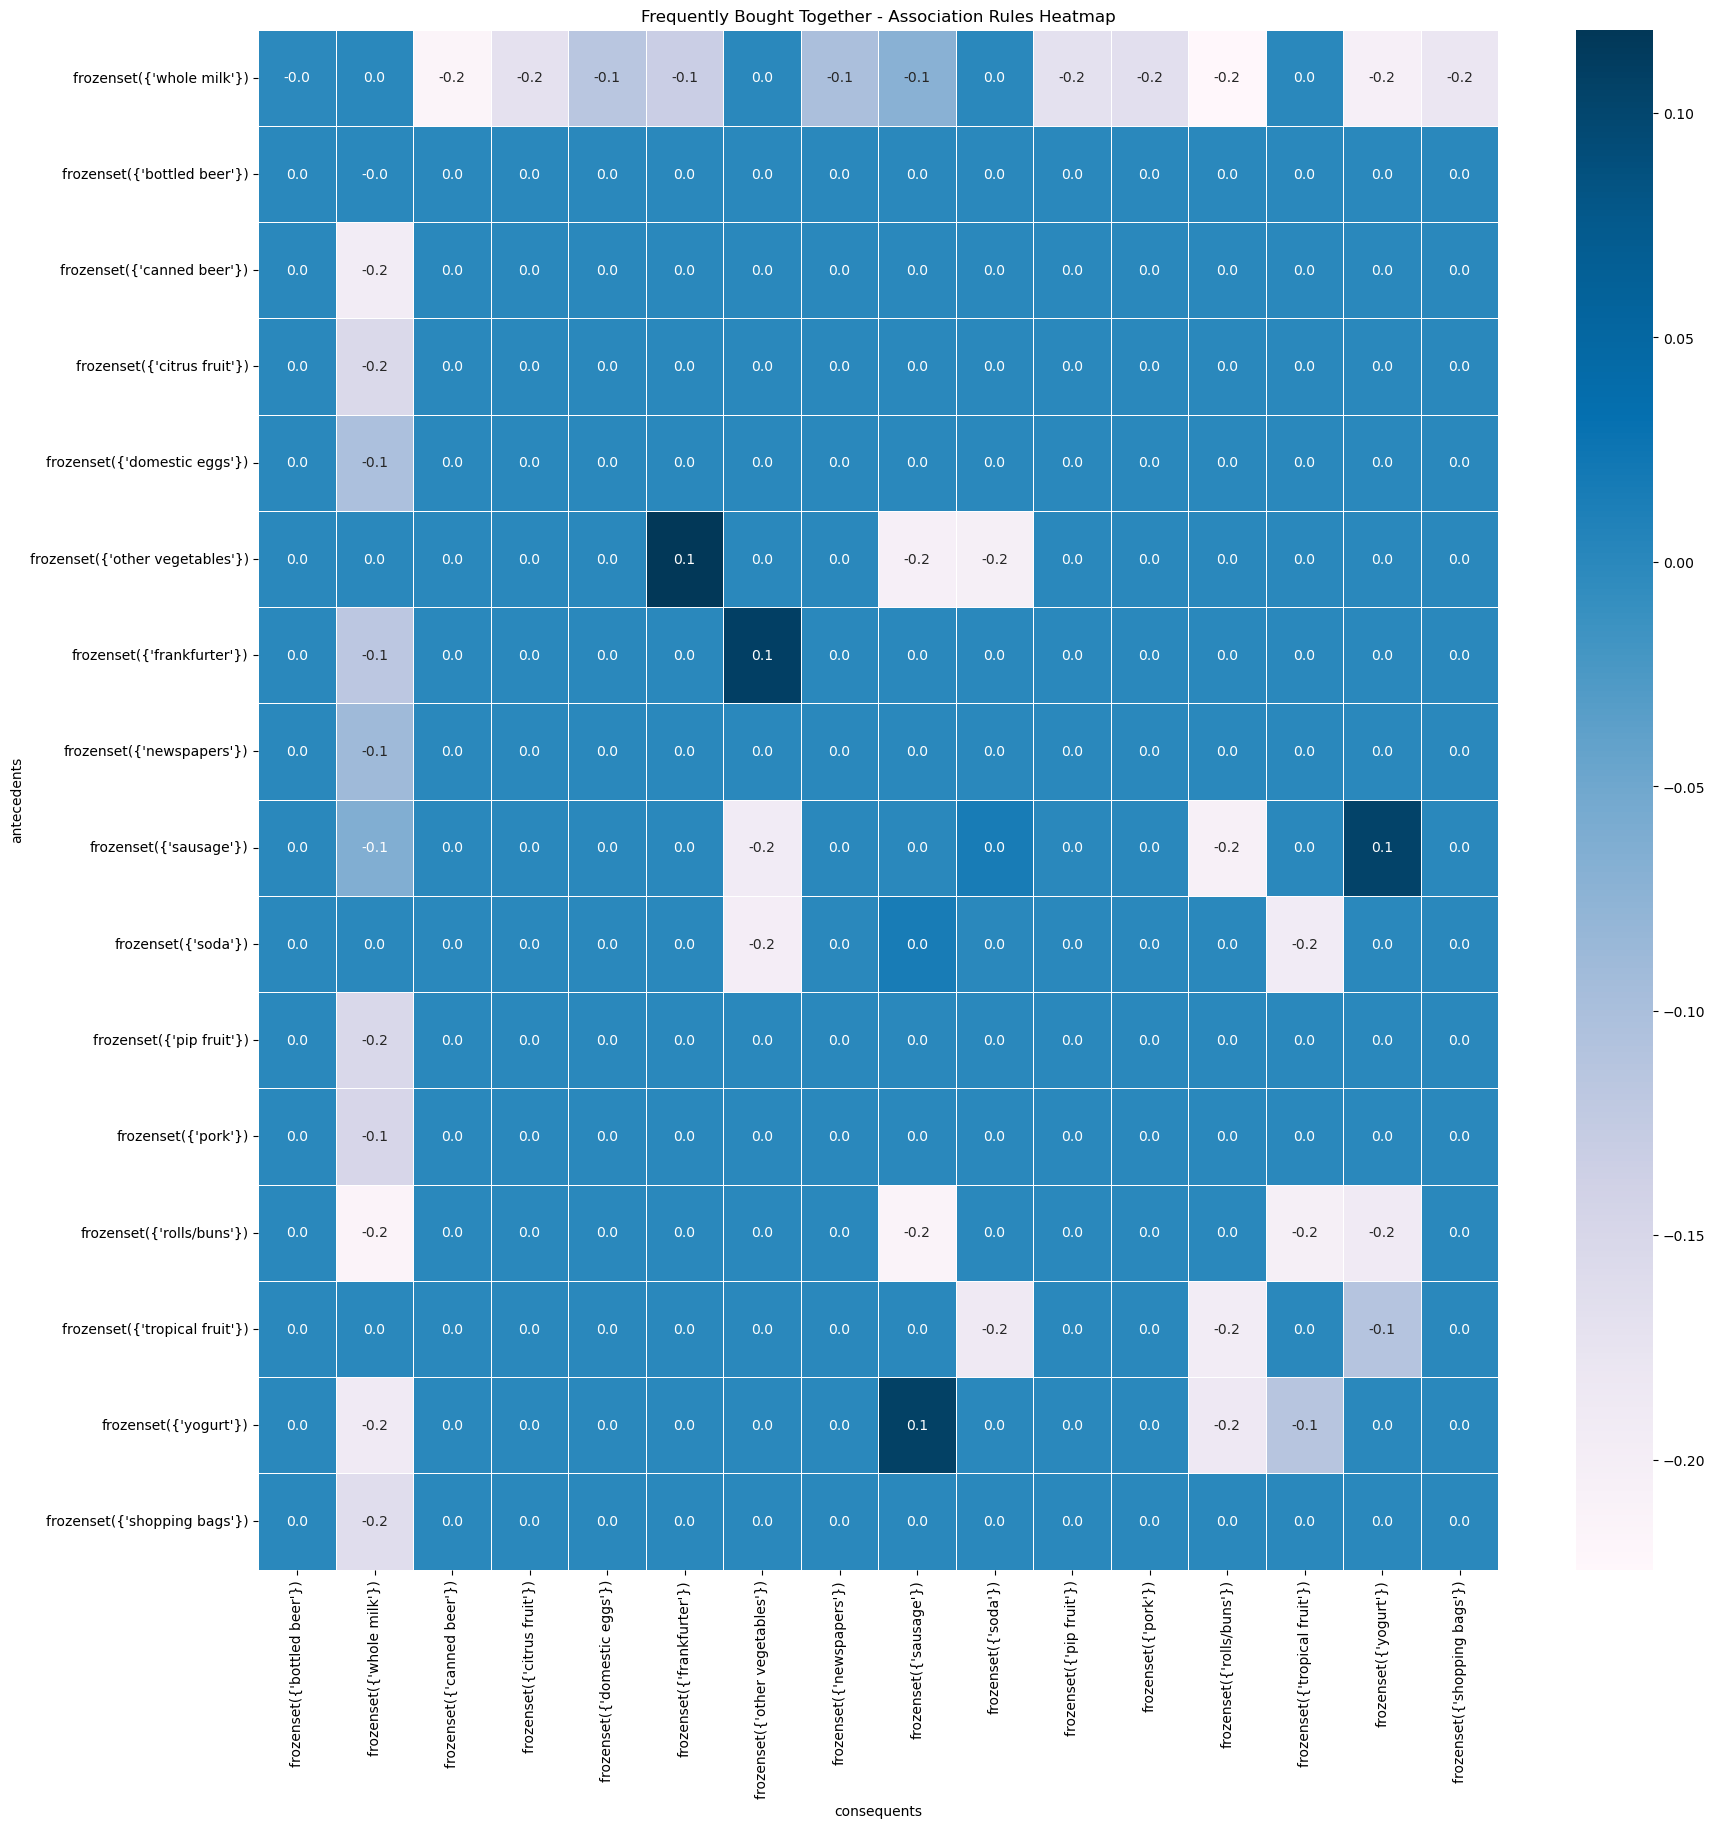

In [15]:
# Creating a matrix of product associations
product_associations = rules.pivot(index='antecedents', columns='consequents', values='zhangs_metric').fillna(0)

# Create a heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(product_associations, annot=True, cmap="PuBu", fmt=".1f", linewidths=.5)
plt.title("Frequently Bought Together - Association Rules Heatmap")
plt.show()

# I used Zhang's metric in my viz because it combines support, confidence, and lift into a single measure.
# A negative value suggests that the occurrence of the antecedent reduces the likelihood of the consequent.
# It implies that despite a certain level of confidence, the occurrence of the antecedent reduces the overall support or likelihood of the consequent, leading to a negative impact or anti-association.
# In practical terms, a negative Zhang's metric might suggest scenarios where the presence of one item in a transaction makes the occurrence of another item less likely than expected.
# A positive Zhang's metric would the opposite

In [16]:
# Taking pairs with positive Zhang's metric in a separate dataframe

pos_pair = rules[rules['zhangs_metric'] > 0]

pos_pair.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
8,(other vegetables),(frankfurter),0.122101,0.037760,0.005146,0.042146,1.116150,0.000536,1.004579,0.118536
9,(frankfurter),(other vegetables),0.037760,0.122101,0.005146,0.136283,1.116150,0.000536,1.016420,0.108146
30,(sausage),(soda),0.060349,0.097106,0.005948,0.098560,1.014975,0.000088,1.001613,0.015702
31,(soda),(sausage),0.097106,0.060349,0.005948,0.061253,1.014975,0.000088,1.000963,0.016341
34,(sausage),(yogurt),0.060349,0.085879,0.005748,0.095238,1.108986,0.000565,1.010345,0.104587


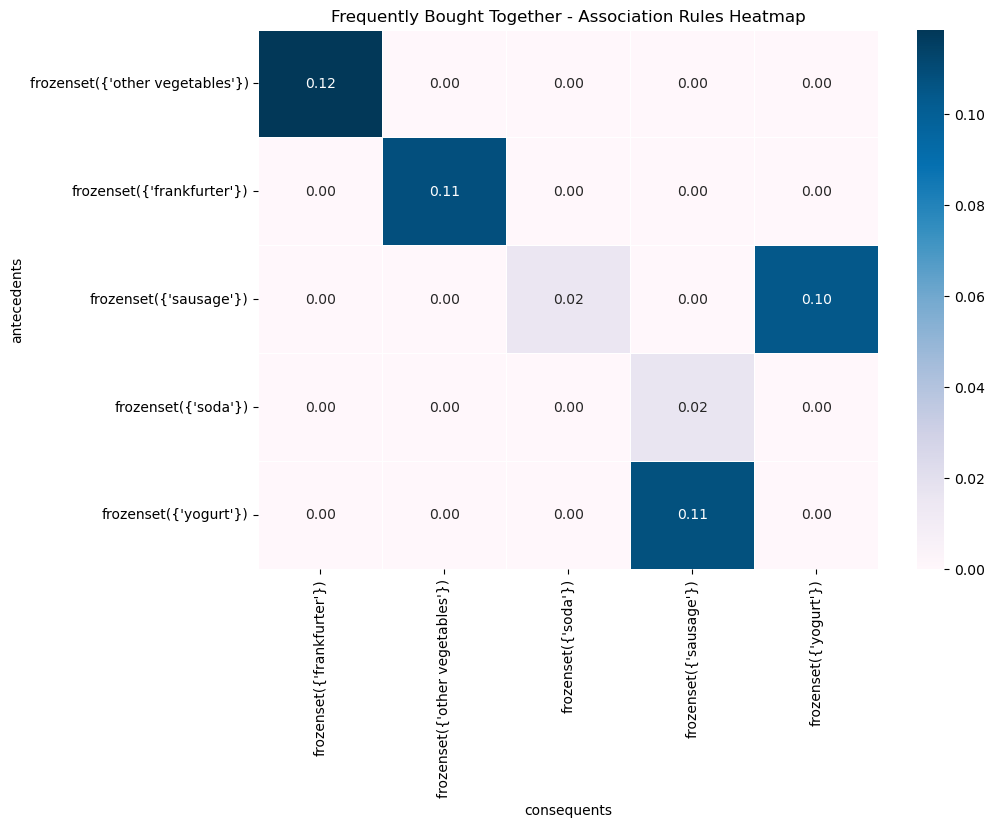

In [17]:
# Creating a matrix of product associations
pos_association = pos_pair.pivot(index='antecedents', columns='consequents', values='zhangs_metric').fillna(0)

# Create a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(pos_association, annot=True, cmap="PuBu", fmt=".2f", linewidths=.5)
plt.title("Frequently Bought Together - Association Rules Heatmap")
plt.show()


### Insights:

The most frequently purchased items are whole milk, other vegetables, rolls/buns, soda, and yogurt. The least frequently purchased items are preservation products, kitchen utensil, baby cosmetics, bags, and rubbing alcohol. The 20 (12% of all items) most frequently purchased items account for over 52% of all purchases. Conversely, the 90 (54% of all items) least frequently purchased items account for less than 10% of all purchases.

August 2015 had the highest number of purchases, while March 2014 had the lowest number of purchases. Also, members purchased the most items on Thursdays and the least on Mondays.

While whole milk is the most frequently purchased item, it is not strongly associated with any other items. On the other hand, frankfurter and other vegetables, soda and sausage, and yoghurt and sausage are 3 sets of items with high product associations. 



### Recommendation:
The members are really interested in relatively few items, thus, the retail company could review some of the least frequently purchased items to decide whether or not to continue selling them. Three item combinations were shown to be highly associated - frankfurter and other vegetables, soda and sausage, and yoghurt and sausage. Each item will positively influence the purchase of its pair, thus, the company is encouraged to take advantage of this to boost sales.
